# PD ESTIMATION

In this Notebook, our aim is to build a PD model, validate the model, creating a scorecard, calculating the credit score of each customers. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
import os
import datetime as date
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
#To display all columns name
pd.options.display.max_columns = None
#To display all rows name
pd.options.display.max_rows = 100

In [56]:
loan_data_inputs_train_Bu = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train_Bu = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_train.csv', index_col=0)#
loan_data_inputs_test_Bu = pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test_Bu =  pd.read_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_test.csv', index_col=0)#, header=None
print(loan_data_inputs_train_Bu.shape)
print(loan_data_inputs_test_Bu.shape)
print(loan_data_targets_train_Bu.shape)
print(loan_data_targets_test_Bu.shape)

(373028, 322)
(93257, 322)
(373028, 1)
(93257, 1)


In [57]:
#We make a copy of our file
loan_data_inputs_train = loan_data_inputs_train_Bu.copy()
loan_data_targets_train = loan_data_targets_train_Bu.copy() 
loan_data_inputs_test = loan_data_inputs_test_Bu.copy()
loan_data_targets_test = loan_data_targets_test_Bu.copy()

In [58]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_date,mths_since_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,addr_state:ND,addr_state:ND_NE_IA_NV_FL_AL_HI,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,home_ownership:RENT_OTHER_NONE,purpose:edu_smbus_ren_mov,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date_factor,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,mths_since_issue_date:>96,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,funded_amnt_factor,mths_since_

In [8]:
print(loan_data_inputs_train.columns.values)

['Unnamed: 0.1' 'id' 'member_id' 'loan_amnt' 'funded_amnt'
 'funded_amnt_inv' 'term' 'int_rate' 'installment' 'grade' 'sub_grade'
 'emp_title' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan' 'url' 'desc'
 'purpose' 'title' 'zip_code' 'addr_state' 'dti' 'delinq_2yrs'
 'earliest_cr_line' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_record' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'mths_since_last_major_derog' 'policy_code'
 'application_type' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'tota

In [9]:
print(loan_data_inputs_test.columns.values)

['Unnamed: 0.1' 'id' 'member_id' 'loan_amnt' 'funded_amnt'
 'funded_amnt_inv' 'term' 'int_rate' 'installment' 'grade' 'sub_grade'
 'emp_title' 'emp_length' 'home_ownership' 'annual_inc'
 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan' 'url' 'desc'
 'purpose' 'title' 'zip_code' 'addr_state' 'dti' 'delinq_2yrs'
 'earliest_cr_line' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_record' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee'
 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'mths_since_last_major_derog' 'policy_code'
 'application_type' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'tota

In [59]:
inputs_train_with_ref_cat = loan_data_inputs_train[[       'grade:A', 
                                                           'grade:B', 
                                                           'grade:C', 
                                                           'grade:D', 
                                                           'grade:E', 
                                                           'grade:F', 
                                                           'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE',
                                                           'home_ownership:MORTGAGE',
                                                           'home_ownership:OWN',
                                                           'addr_state:NY',
                                                           'addr_state:TX',
                                                           'addr_state:CA',
                                                           'addr_state:ND_NE_IA_NV_FL_AL_HI', 
                                                           'addr_state:MO_MD',
                                                           'addr_state:LA_NC_NJ_NM_UT',
                                                           'addr_state:KY_MI_DE_VA',
                                                           'addr_state:MN_PA_AZ_AR_WA_TN_OK', 
                                                           'addr_state:OH_RI_IN_GA_MA_OR_WI',
                                                           'addr_state:SD_IL',
                                                           'addr_state:KS_CT', 
                                                           'addr_state:CO_MS_SC_AK_VT_MT',
                                                           'addr_state:WV_NH_WY_DC_ME_ID',
                                                           'verification_status:Not Verified', 
                                                           'verification_status:Source Verified',
                                                           'verification_status:Verified',
                                                           'purpose:edu_smbus_ren_mov',
                                                           'purpose:other_vac_med_wedd_hse', 
                                                           'purpose:car_home_imp_mjpurchase',
                                                           'purpose:credit_card', 
                                                           'purpose:debt_consolidation',
                                                           'initial_list_status:f', 
                                                           'initial_list_status:w',
                                                           'term:36', 
                                                           'term:60', 
                                                           'emp_length:0', 
                                                           'emp_length:1', 
                                                           'emp_length:2-4',
                                                           'emp_length:5-6', 
                                                           'emp_length:7-9',
                                                           'emp_length:10',
                                                           'mths_since_issue_date:<50',
                                                           'mths_since_issue_date:50-51', 
                                                           'mths_since_issue_date:52-53',
                                                           'mths_since_issue_date:54-60', 
                                                           'mths_since_issue_date:61-64',
                                                           'mths_since_issue_date:65-76', 
                                                           'mths_since_issue_date:77-96',
                                                           'mths_since_issue_date:>96',
                                                           'int_rate:<9.548',
                                                           'int_rate:9.548-12.025',
                                                           'int_rate:12.025-15.74', 
                                                           'int_rate:15.74-20.281', 
                                                           'int_rate:>20.281',
                                                           'mths_since_earliest_cr_line:<144',
                                                           'mths_since_earliest_cr_line:144-167',
                                                           'mths_since_earliest_cr_line:168-239',
                                                           'mths_since_earliest_cr_line:240-275',
                                                           'mths_since_earliest_cr_line:276-371', 
                                                           'mths_since_earliest_cr_line:>371',
                                                           'delinq_2yrs:0',
                                                           'delinq_2yrs:1-3',
                                                           'delinq_2yrs:>=4',
                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-2',
                                                           'inq_last_6mths:3-5', 
                                                           'inq_last_6mths:>5',
                                                           'open_acc:0',
                                                           'open_acc:1-3',
                                                           'open_acc:4-12',
                                                           'open_acc:13-17',
                                                           'open_acc:18-22',
                                                           'open_acc:>=23',
                                                           'pub_rec:0',
                                                           'pub_rec:>=1',
                                                           'acc_now_delinq:0',
                                                           'acc_now_delinq:>=1',
                                                           'total_rev_hi_lim:<=5K',
                                                           'total_rev_hi_lim:5K-10K',
                                                           'total_rev_hi_lim:10K-20K',
                                                           'total_rev_hi_lim:20K-30K',
                                                           'total_rev_hi_lim:30K-40K',
                                                           'total_rev_hi_lim:40K-55K',
                                                           'total_rev_hi_lim:55K-95K',
                                                           'total_rev_hi_lim:>95K',
                                                           'annual_inc:<20K', 
                                                           'annual_inc:20K-30K', 
                                                           'annual_inc:30K-40K',
                                                           'annual_inc:40K-50K', 
                                                           'annual_inc:50K-60K', 
                                                           'annual_inc:60K-70K',
                                                           'annual_inc:70K-80K', 
                                                           'annual_inc:80K-90K', 
                                                           'annual_inc:90K-100K',
                                                           'annual_inc:100K-125K', 
                                                           'annual_inc:125K-150K', 
                                                           'annual_inc:>150K',
                                                           'mths_since_last_delinq:Missing',
                                                           'mths_since_last_delinq:0-3',
                                                           'mths_since_last_delinq:4-30',
                                                           'mths_since_last_delinq:31-56',
                                                           'mths_since_last_delinq:>=57',
                                                           'dti:<=1.4', 
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7', 
                                                           'dti:7.7-10.5', 
                                                           'dti:10.5-16.1', 
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7', 
                                                           'dti:21.7-22.4', 
                                                           'dti:22.4-35', 
                                                           'dti:>35',
                                                           'mths_since_last_record:Missing',
                                                           'mths_since_last_record:0-2',
                                                           'mths_since_last_record:3-20', 
                                                           'mths_since_last_record:21-31',
                                                           'mths_since_last_record:32-80', 
                                                           'mths_since_last_record:81-86',
                                                           'mths_since_last_record:>=86']]

In [60]:
print(inputs_train_with_ref_cat.shape)
inputs_train_with_ref_cat.head()

(373028, 119)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:ND_NE_IA_NV_FL_AL_HI,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:edu_smbus_ren_mov,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,mths_since_issue_date:>96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<144,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:>=4,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,inq_last_6mths:>5,open_acc:0,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:>=23,pub_rec:0,pub_rec:>=1,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
5912,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
458269,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
142371,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
116543,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
449188,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [13]:
#inputs_train_with_ref_cat.to_csv(r"D:\DataBases\DataSets\Credit_Risk_Modeling\inputs_train_with_ref_cat.csv")

In [61]:
ref_categories = ["grade:G",
"home_ownership:RENT_OTHER_NONE",
"addr_state:ND_NE_IA_NV_FL_AL_HI",
"verification_status:Verified",
"purpose:edu_smbus_ren_mov",
"initial_list_status:f",
"term:60",
"emp_length:0",
"mths_since_issue_date:>96",
"int_rate:>20.281",
"mths_since_earliest_cr_line:<144",
"delinq_2yrs:>=4",
"inq_last_6mths:>5",
"open_acc:0",
"pub_rec:0",
"acc_now_delinq:0",
"total_rev_hi_lim:<=5K",
"annual_inc:<20K",
"dti:>35",
"mths_since_last_delinq:0-3",
"mths_since_last_record:0-2"]

In [62]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis= 1)

In [63]:
print(inputs_train.shape)
inputs_train.head()

(373028, 98)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:>=23,pub_rec:>=1,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
5912,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
458269,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
142371,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
116543,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
449188,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
inputs_train.isnull().sum().sum()

0

# 1.PD MODEL ESTIMATION

# LOGISTIC REGRESSION

In [64]:
features_name = inputs_train.columns.values

In [ ]:
#Logistic regressionwith p-value to estimate the most singnificant variables

In [65]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [66]:
%%time
log_reg = LogisticRegression_with_p_values()
log_reg.fit(inputs_train, loan_data_targets_train)

Wall time: 9.55 s


In [67]:
summary_table = pd.DataFrame(columns = ['Features_name'], data = features_name)
summary_table['Coefficients'] = np.transpose(log_reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features_name,Coefficients
0,Intercept,-1.505702
1,grade:A,0.957583
2,grade:B,0.874662
3,grade:C,0.667012
4,grade:D,0.494685
5,grade:E,0.338172
6,grade:F,0.164853
7,home_ownership:MORTGAGE,0.075428
8,home_ownership:OWN,0.055978
9,addr_state:NY,0.074112


In [68]:
p_values = log_reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Features_name,Coefficients,p_values
0,Intercept,-1.505702,NaN
1,grade:A,0.957583,8.120222e-21
2,grade:B,0.874662,6.488363e-42
3,grade:C,0.667012,5.406039e-29
4,grade:D,0.494685,3.044026e-18
5,grade:E,0.338172,2.417302e-11
6,grade:F,0.164853,1.793157e-03
7,home_ownership:MORTGAGE,0.075428,2.267229e-08
8,home_ownership:OWN,0.055978,8.916400e-03
9,addr_state:NY,0.074112,4.169716e-03


In [18]:
path = r"D:\DataBases\DataSets\Credit_Risk_Modeling"

In [20]:
summary_table.to_csv(path + "\summary_table.csv", index= False)

In [ ]:
#We select the most significant variables
#According to the p-value the variables delinq_2yrs, open_acc, acc_now_delinq,
#total_acc,total_rev_hi_lim,mths_since_last_delinq, mths_since_last_record, will not be included in the model  

In [70]:
#We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train = loan_data_inputs_train[['grade:A', 
                                                           'grade:B', 
                                                           'grade:C', 
                                                           'grade:D', 
                                                           'grade:E', 
                                                           'grade:F', 
                                                           'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE',
                                                           'home_ownership:MORTGAGE',
                                                           'home_ownership:OWN',
                                                           'addr_state:NY',
                                                           'addr_state:TX',
                                                           'addr_state:CA',
                                                           'addr_state:ND_NE_IA_NV_FL_AL_HI', 
                                                           'addr_state:MO_MD',
                                                           'addr_state:LA_NC_NJ_NM_UT',
                                                           'addr_state:KY_MI_DE_VA',
                                                           'addr_state:MN_PA_AZ_AR_WA_TN_OK', 
                                                           'addr_state:OH_RI_IN_GA_MA_OR_WI',
                                                           'addr_state:SD_IL',
                                                           'addr_state:KS_CT', 
                                                           'addr_state:CO_MS_SC_AK_VT_MT',
                                                           'addr_state:WV_NH_WY_DC_ME_ID',
                                                           'verification_status:Not Verified', 
                                                           'verification_status:Source Verified',
                                                           'verification_status:Verified',
                                                           'purpose:edu_smbus_ren_mov',
                                                           'purpose:other_vac_med_wedd_hse', 
                                                           'purpose:car_home_imp_mjpurchase',
                                                           'purpose:credit_card', 
                                                           'purpose:debt_consolidation',
                                                           'initial_list_status:f', 
                                                           'initial_list_status:w',
                                                           'term:36', 
                                                           'term:60', 
                                                           'emp_length:0', 
                                                           'emp_length:1', 
                                                           'emp_length:2-4',
                                                           'emp_length:5-6', 
                                                           'emp_length:7-9',
                                                           'emp_length:10',
                                                           'mths_since_issue_date:<50',
                                                           'mths_since_issue_date:50-51', 
                                                           'mths_since_issue_date:52-53',
                                                           'mths_since_issue_date:54-60', 
                                                           'mths_since_issue_date:61-64',
                                                           'mths_since_issue_date:65-76', 
                                                           'mths_since_issue_date:77-96',
                                                           'mths_since_issue_date:>96',
                                                           'int_rate:<9.548',
                                                           'int_rate:9.548-12.025',
                                                           'int_rate:12.025-15.74', 
                                                           'int_rate:15.74-20.281', 
                                                           'int_rate:>20.281',
                                                           'mths_since_earliest_cr_line:<144',
                                                           'mths_since_earliest_cr_line:144-167',
                                                           'mths_since_earliest_cr_line:168-239',
                                                           'mths_since_earliest_cr_line:240-275',
                                                           'mths_since_earliest_cr_line:276-371', 
                                                           'mths_since_earliest_cr_line:>371',
                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-2',
                                                           'inq_last_6mths:3-5', 
                                                           'inq_last_6mths:>5',
                                                           'pub_rec:0',
                                                           'pub_rec:>=1',
                                                           'annual_inc:<20K', 
                                                           'annual_inc:20K-30K', 
                                                           'annual_inc:30K-40K',
                                                           'annual_inc:40K-50K', 
                                                           'annual_inc:50K-60K', 
                                                           'annual_inc:60K-70K',
                                                           'annual_inc:70K-80K', 
                                                           'annual_inc:80K-90K', 
                                                           'annual_inc:90K-100K',
                                                           'annual_inc:100K-125K', 
                                                           'annual_inc:125K-150K', 
                                                           'annual_inc:>150K',
                                                           'dti:<=1.4', 
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7', 
                                                           'dti:7.7-10.5', 
                                                           'dti:10.5-16.1', 
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7', 
                                                           'dti:21.7-22.4', 
                                                           'dti:22.4-35', 
                                                           'dti:>35']]

In [71]:
print(inputs_train.shape)

(373028, 88)


In [72]:
ref_categories = ["grade:G",
"home_ownership:RENT_OTHER_NONE",
"addr_state:ND_NE_IA_NV_FL_AL_HI",
"verification_status:Verified",
"purpose:edu_smbus_ren_mov",
"initial_list_status:f",
"term:60",
"emp_length:0",
"mths_since_issue_date:>96",
"int_rate:>20.281",
"mths_since_earliest_cr_line:<144",
"inq_last_6mths:>5",
"pub_rec:0",
"annual_inc:<20K",
"dti:>35"]

In [73]:
inputs_train = inputs_train.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
5912,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
458269,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
142371,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
116543,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
449188,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
print(inputs_train.shape)

(373028, 73)


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
#We define a function to calculate our performance metrics
def evaluate_preds(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F-1: {f1*100:.2f}%")
    
    return metric_dict

In [77]:
%%time
#We create a dictinnay containing the parameters we would like to adjust as the keys and then the values 
#we would like to try as the values of the dict
penalties = np.arange(1,10,1)
grid={"C":penalties,
      "penalty":["l1", "l2"]}
clf= LogisticRegression()
#rsCV
rscv_clf = RandomizedSearchCV(estimator=clf,
                             param_distributions=grid,
                             n_iter=10,#number of model to try
                             cv=5,
                             verbose=0)
#fit the RandomizedSearchCv version of clf
rscv_clf.fit(inputs_train, loan_data_targets_train)

Wall time: 2min 50s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, 

In [78]:
#call the estimator with the best result 
rscv_clf.best_params_

{'penalty': 'l2', 'C': 4}

In [79]:
start = date.datetime.now()
#instantiate the model
lr_clf = LogisticRegression(C = 4, penalty= 'l2')
#We fit the model with the traing data
lr_clf.fit(inputs_train, loan_data_targets_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:07.849824


In [80]:
features_name = inputs_train.columns

In [81]:
lr_clf.intercept_

array([-1.28528317])

In [82]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Features_name'], data = features_name)
summary_table['Coefficients'] = np.transpose(lr_clf.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_clf.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Features_name,Coefficients
0,Intercept,-1.285283
1,grade:A,1.015265
2,grade:B,0.903458
3,grade:C,0.693160
4,grade:D,0.518789
5,grade:E,0.357031
6,grade:F,0.180735
7,home_ownership:MORTGAGE,0.073021
8,home_ownership:OWN,0.053372
9,addr_state:NY,0.076527


**Interpretation of the coefficients**<br>

>-For the variable grade:reference category=grade:G, A is the best category in term of WoE good bad loan and G is the worst category<br>
>-All coefs are positive.ie.observations with all these values are all better than observations witha rating of G<br>
>-From F to A, the coefficients are increasing in magnitude ie.the odd of being good borrower are increasing as the external credit rating is increasing<br>
>-The odds of someone with ER of D to be better than someone with ER of D equals exponent raise ro the power of the coefficient of D<br>
>Exemple:e^0.5063=1.66.i.e the odds of someone with ER of D to be a good borrower are about 1.68 times greather than the odds of someone with ER of G.<br>
Similarly e^0.8842=2.42 i.e the the odds of someone with ER of B to be a good borrower are about 2.42 times greather than the odds of someone with ER of G.<br>
>-the odds of someone with ER of B to be a good borrower are about 2.42/1.66 = 1.45 times greather than the odds of someone with ER of D.<br>

>-The odds of someone with ER of B to be a good borrower are about e^0.8842 =2.42 times greather than The odds of someone with ER of G.<br>
>-The odds of someone with ER of D to be a good borrower are about e^0.5063 =1.66 times greather than The odds of someone with ER of G.<br>
>-The odds of someone with ER of B to be a good borrower are about e^0.8842-0.5063 = 1.459 times greather than the odds of someone with ER of D.<br>

In [83]:
import pickle
path = r"D:\DataBases\DataSets\Credit_Risk_Modeling" 
pickle.dump(lr_clf, open(path + '\pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD MODEL VALIDATION
# Out of sample validation(test)

In [85]:
inputs_test_with_ref_cat = loan_data_inputs_test[['grade:A', 
                                                           'grade:B', 
                                                           'grade:C', 
                                                           'grade:D', 
                                                           'grade:E', 
                                                           'grade:F', 
                                                           'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE',
                                                           'home_ownership:MORTGAGE',
                                                           'home_ownership:OWN',
                                                           'addr_state:NY',
                                                           'addr_state:TX',
                                                           'addr_state:CA',
                                                           'addr_state:ND_NE_IA_NV_FL_AL_HI', 
                                                           'addr_state:MO_MD',
                                                           'addr_state:LA_NC_NJ_NM_UT',
                                                           'addr_state:KY_MI_DE_VA',
                                                           'addr_state:MN_PA_AZ_AR_WA_TN_OK', 
                                                           'addr_state:OH_RI_IN_GA_MA_OR_WI',
                                                           'addr_state:SD_IL',
                                                           'addr_state:KS_CT', 
                                                           'addr_state:CO_MS_SC_AK_VT_MT',
                                                           'addr_state:WV_NH_WY_DC_ME_ID',
                                                           'verification_status:Not Verified', 
                                                           'verification_status:Source Verified',
                                                           'verification_status:Verified',
                                                           'purpose:edu_smbus_ren_mov',
                                                           'purpose:other_vac_med_wedd_hse', 
                                                           'purpose:car_home_imp_mjpurchase',
                                                           'purpose:credit_card', 
                                                           'purpose:debt_consolidation',
                                                           'initial_list_status:f', 
                                                           'initial_list_status:w',
                                                           'term:36', 
                                                           'term:60', 
                                                           'emp_length:0', 
                                                           'emp_length:1', 
                                                           'emp_length:2-4',
                                                           'emp_length:5-6', 
                                                           'emp_length:7-9',
                                                           'emp_length:10',
                                                           'mths_since_issue_date:<50',
                                                           'mths_since_issue_date:50-51', 
                                                           'mths_since_issue_date:52-53',
                                                           'mths_since_issue_date:54-60', 
                                                           'mths_since_issue_date:61-64',
                                                           'mths_since_issue_date:65-76', 
                                                           'mths_since_issue_date:77-96',
                                                           'mths_since_issue_date:>96',
                                                           'int_rate:<9.548',
                                                           'int_rate:9.548-12.025',
                                                           'int_rate:12.025-15.74', 
                                                           'int_rate:15.74-20.281', 
                                                           'int_rate:>20.281',
                                                           'mths_since_earliest_cr_line:<144',
                                                           'mths_since_earliest_cr_line:144-167',
                                                           'mths_since_earliest_cr_line:168-239',
                                                           'mths_since_earliest_cr_line:240-275',
                                                           'mths_since_earliest_cr_line:276-371', 
                                                           'mths_since_earliest_cr_line:>371',
                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-2',
                                                           'inq_last_6mths:3-5', 
                                                           'inq_last_6mths:>5',
                                                           'pub_rec:0',
                                                           'pub_rec:>=1',
                                                           'annual_inc:<20K', 
                                                           'annual_inc:20K-30K', 
                                                           'annual_inc:30K-40K',
                                                           'annual_inc:40K-50K', 
                                                           'annual_inc:50K-60K', 
                                                           'annual_inc:60K-70K',
                                                           'annual_inc:70K-80K', 
                                                           'annual_inc:80K-90K', 
                                                           'annual_inc:90K-100K',
                                                           'annual_inc:100K-125K', 
                                                           'annual_inc:125K-150K', 
                                                           'annual_inc:>150K',
                                                           'dti:<=1.4', 
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7', 
                                                           'dti:7.7-10.5', 
                                                           'dti:10.5-16.1', 
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7', 
                                                           'dti:21.7-22.4', 
                                                           'dti:22.4-35', 
                                                           'dti:>35']]

In [86]:
ref_categories = ["grade:G",
"home_ownership:RENT_OTHER_NONE",
"addr_state:ND_NE_IA_NV_FL_AL_HI",
"verification_status:Verified",
"purpose:edu_smbus_ren_mov",
"initial_list_status:f",
"term:60",
"emp_length:0",
"mths_since_issue_date:>96",
"int_rate:>20.281",
"mths_since_earliest_cr_line:<144",
"inq_last_6mths:>5",
"pub_rec:0",
"annual_inc:<20K",
"dti:>35"]

In [87]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [88]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
161585,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
229952,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
36892,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
262682,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
250510,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [89]:
print(inputs_train.shape)
print(inputs_test.shape)

(373028, 73)
(93257, 73)


In [111]:
#prediction
y_pred = lr_clf.predict(inputs_test)

In [112]:
y_pred_prob = lr_clf.predict_proba(inputs_test)

In [113]:
#Arrey of 2 columns: 1st column = prob of default(bad borrower), 2nd column= prob of being a good borrower
y_pred_prob

array([[0.1404118 , 0.8595882 ],
       [0.06807774, 0.93192226],
       [0.23290021, 0.76709979],
       ...,
       [0.17869308, 0.82130692],
       [0.04139507, 0.95860493],
       [0.07354396, 0.92645604]])

In [114]:
#We select only the prob of non default of each element
y_pred_prob[:][:, 1]

array([0.8595882 , 0.93192226, 0.76709979, ..., 0.82130692, 0.95860493,
       0.92645604])

In [115]:
#We select only the prob of being a good borrower
#To select only the second column of an array, we chose all array and then from each array, only the second column 
y_pred_prob = y_pred_prob[:][:, 1]

In [116]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

In [117]:
df_actual_pred_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_pred_prob)], axis= 1)

In [118]:
df_actual_pred_probs.shape

(93257, 2)

In [119]:
df_actual_pred_probs.columns = ["loan_data_targets_test", "y_hat_test_prob"]

In [120]:
df_actual_pred_probs.index = loan_data_inputs_test.index

In [121]:
df_actual_pred_probs.head()

,loan_data_targets_test,y_hat_test_prob
161585,1,0.859588
229952,1,0.931922
36892,0,0.767100
262682,0,0.868411
250510,1,0.991646


**ACCURACY AND ROC AUC**

In [122]:
#Objectif Minimize the FP and FN
#Treshold
tr = 0.95 
df_actual_pred_probs["y_pred_test"] = np.where(df_actual_pred_probs["y_hat_test_prob"] > tr, 1, 0)

In [123]:
pd.crosstab(df_actual_pred_probs["loan_data_targets_test"], df_actual_pred_probs["y_pred_test"],
           rownames= ["Actual"], colnames = ["predicted"])
#1:non_defaulter(good borrower)
#0: defaulter (bad borrower)
#Minimize the FP(FP:defaulter predicted as non_defaulter) error_type 1 
#             FN(non_defaulter predicted as defaulter) error_type 2 

predicted,0,1
Actual,,
0,8076,795
1,57437,26949


In [124]:
pd.crosstab(df_actual_pred_probs["loan_data_targets_test"], df_actual_pred_probs["y_pred_test"],
           rownames= ["Actual"], colnames = ["predicted"])/df_actual_pred_probs.shape[0]

predicted,0,1
Actual,,
0,0.086599,0.008525
1,0.615900,0.288976


In [125]:
(pd.crosstab(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_pred_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_pred_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred_probs.shape[0]).iloc[1, 1]

0.3755750238587988

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

In [128]:
roc_curve(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_hat_test_prob'])
#Three array: 1st column contains FP, second FN and 3rd the tresholds 

(array([0.00000000e+00, 1.12726863e-04, 1.12726863e-04, ...,
        9.99887273e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.        , 0.00280852, ..., 0.99998815, 0.99998815,
        1.        ]),
 array([1.99579106, 0.99579106, 0.99208214, ..., 0.46520846, 0.45789705,
        0.43616555]))

Text(0.5, 1.0, 'ROC curve')

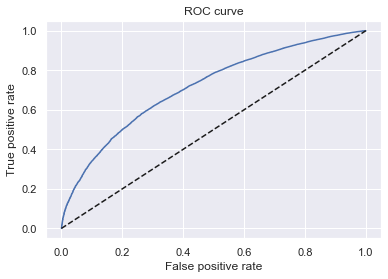

In [129]:
fpr, tpr, thresholds = roc_curve(df_actual_pred_probs['loan_data_targets_test'],
                                 df_actual_pred_probs['y_hat_test_prob'], color = '#fdcb6e')

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k', color = '#0984e3')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [130]:
AUROC = roc_auc_score(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_hat_test_prob'])
AUROC

0.7152991968190319

**Gini & Kolmogorov-Smirnov** 

In [131]:
#We need forst to order our dataframe that contains the targets and the prob by the estimated prob by
#ascending order
df_actual_pred_probs = df_actual_pred_probs.sort_values('y_hat_test_prob')
# Sorts a dataframe by the values of a specific column.

In [132]:
df_actual_pred_probs = df_actual_pred_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [133]:
df_actual_pred_probs.head()

,index,loan_data_targets_test,y_hat_test_prob,y_pred_test
0,40408,1,0.436166,0
1,40100,0,0.457897,0
2,41183,1,0.465208,0
3,230472,0,0.466420,0
4,40211,0,0.466828,0


In [134]:
df_actual_pred_probs.tail()

,index,loan_data_targets_test,y_hat_test_prob,y_pred_test
93252,232642,1,0.994903,1
93253,245248,1,0.995061,1
93254,244383,1,0.995212,1
93255,247902,1,0.995678,1
93256,260805,0,0.995791,1


In [135]:
df_actual_pred_probs['Cumulative_N_Population'] = df_actual_pred_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in python starts from 0, we add 1 to each index.
df_actual_pred_probs['Cumulative_N_Good'] = df_actual_pred_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_pred_probs['Cumulative_N_Bad'] = df_actual_pred_probs['Cumulative_N_Population'] - df_actual_pred_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [136]:
df_actual_pred_probs['Cumulative_Perc_Population'] = df_actual_pred_probs['Cumulative_N_Population'] / (df_actual_pred_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_pred_probs['Cumulative_Perc_Good'] = df_actual_pred_probs['Cumulative_N_Good'] / df_actual_pred_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_pred_probs['Cumulative_Perc_Bad'] = df_actual_pred_probs['Cumulative_N_Bad'] / (df_actual_pred_probs.shape[0] - df_actual_pred_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [137]:
df_actual_pred_probs.head()

,index,loan_data_targets_test,y_hat_test_prob,y_pred_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_Perc_Population,Cumulative_Perc_Good,Cumulative_Perc_Bad
0,40408,1,0.436166,0,1,1,0,0.000011,0.000012,0.000000
1,40100,0,0.457897,0,2,1,1,0.000021,0.000012,0.000113
2,41183,1,0.465208,0,3,2,1,0.000032,0.000024,0.000113
3,230472,0,0.466420,0,4,2,2,0.000043,0.000024,0.000225
4,40211,0,0.466828,0,5,2,3,0.000054,0.000024,0.000338


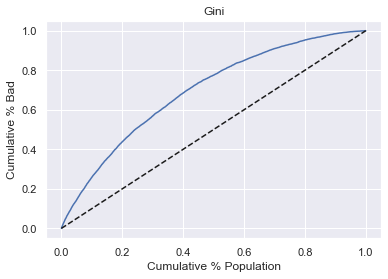

In [138]:
# Plot Gini
plt.plot(df_actual_pred_probs['Cumulative_Perc_Population'], df_actual_pred_probs['Cumulative_Perc_Bad'], color = '#fdcb6e')
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_pred_probs['Cumulative_Perc_Population'], df_actual_pred_probs['Cumulative_Perc_Population'], linestyle = '--', color = '#0984e3')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini');
# We name the graph "Gini".

In [139]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.43059839363806374

**KOLMOGOROV SMIRNOV**

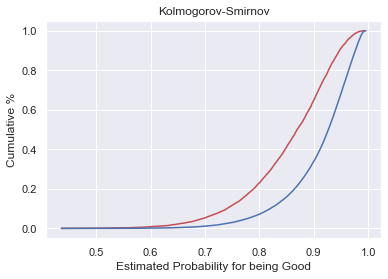

In [141]:
# Plot KS
plt.plot(df_actual_pred_probs['y_hat_test_prob'], df_actual_pred_probs['Cumulative_Perc_Bad'], color = 'orange')##d63031
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_pred_probs['y_hat_test_prob'], df_actual_pred_probs['Cumulative_Perc_Good'], color = 'b')##0984e3
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov');
# We name the graph "Kolmogorov-Smirnov".

In [142]:
KS = max(df_actual_pred_probs['Cumulative_Perc_Bad'] - df_actual_pred_probs['Cumulative_Perc_Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.3170865799079928

# Applying PD MODEL
**Calculating PD of Individual Accounts**

**Creating a Scorecard**

In [143]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE',
 'addr_state:ND_NE_IA_NV_FL_AL_HI',
 'verification_status:Verified',
 'purpose:edu_smbus_ren_mov',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_date:>96',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<144',
 'inq_last_6mths:>5',
 'pub_rec:0',
 'annual_inc:<20K',
 'dti:>35']

In [144]:
df_ref_categories = pd.DataFrame(ref_categories, columns= ["Features_name"])
df_ref_categories["Coefficients"] = 0
df_ref_categories

,Features_name,Coefficients
0,grade:G,0
1,home_ownership:RENT_OTHER_NONE,0
2,addr_state:ND_NE_IA_NV_FL_AL_HI,0
3,verification_status:Verified,0
4,purpose:edu_smbus_ren_mov,0
5,initial_list_status:f,0
6,term:60,0
7,emp_length:0,0
8,mths_since_issue_date:>96,0
9,int_rate:>20.281,0


In [145]:
#We combine the two data frame by concating
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Features_name,Coefficients
0,0,Intercept,-1.285283
1,1,grade:A,1.015265
2,2,grade:B,0.903458
3,3,grade:C,0.693160
4,4,grade:D,0.518789
5,5,grade:E,0.357031
6,6,grade:F,0.180735
7,7,home_ownership:MORTGAGE,0.073021
8,8,home_ownership:OWN,0.053372
9,9,addr_state:NY,0.076527


In [280]:
#To insert the intercept at the 1st index column
#df_scorecard.loc[-1] = [0, 'intercept', -1.575834]  # adding a row
#df_scorecard.index = df_scorecard.index + 1  # shifting index
#df_scorecard.sort_index(inplace=True) 

In [146]:
df_scorecard

,index,Features_name,Coefficients
0,0,Intercept,-1.285283
1,1,grade:A,1.015265
2,2,grade:B,0.903458
3,3,grade:C,0.693160
4,4,grade:D,0.518789
5,5,grade:E,0.357031
6,6,grade:F,0.180735
7,7,home_ownership:MORTGAGE,0.073021
8,8,home_ownership:OWN,0.053372
9,9,addr_state:NY,0.076527


In [147]:
#To separate the name from the original features from the dummy variables.ex: to separeta "grade" from "grade:A".
df_scorecard["Original_Features_name"] = df_scorecard["Features_name"].str.split(":").str[0]

In [148]:
#To create a score card, we need to turn the regression coefficinet from the PD model into simple score
#1st we decide the max and min score;ex min=300; max=850
min_score = 300
max_score = 850
#We must rescale the credit worthiness assessment produce by our model to the desired credit score
#We need the min and max of the credit worthiness assesment that can be obtained from the PD Model
#each observation falls only into one dummy category of each original dependent variable.Higher coeff=better borrower; lower coef= default borrower    
#The min credit assessment is reached when a borrower falls into the "worst" categories for all variables(dummy category of the original indepenedent var with lowest model coefficient)
#The max credit assessment is reached when a borrower falls into the "best" categories for all variables(dummy category of the original independent var with highest model coefficient)

In [149]:
#We get the max and min 
df_scorecard.groupby("Original_Features_name")["Coefficients"].min()

Original_Features_name
Intercept                     -1.285283
addr_state                     0.000000
annual_inc                     0.000000
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_date         -0.041063
pub_rec                        0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.006799
Name: Coefficients, dtype: float64

In [150]:
#We summ all the min of all dummy to get the min score possible
min_sum_coef = df_scorecard.groupby("Original_Features_name")["Coefficients"].min().sum()

In [151]:
df_scorecard.groupby("Original_Features_name")["Coefficients"].max()

Original_Features_name
Intercept                     -1.285283
addr_state                     0.517773
annual_inc                     0.638347
dti                            0.394140
emp_length                     0.146628
grade                          1.015265
home_ownership                 0.073021
initial_list_status            0.071356
inq_last_6mths                 0.726903
int_rate                       0.988045
mths_since_earliest_cr_line    0.164347
mths_since_issue_date          1.636421
pub_rec                        0.034206
purpose                        0.430110
term                           0.080356
verification_status            0.076105
Name: Coefficients, dtype: float64

In [152]:
#We summ all the min of all dummy to get the min score possible
max_sum_coef = df_scorecard.groupby("Original_Features_name")["Coefficients"].max().sum()

In [153]:
print(max_sum_coef)
print(min_sum_coef)

5.707740463932355
-1.333144207157544


In [154]:
#We rescale the coefficient to score
df_scorecard["score_calculation"] = df_scorecard["Coefficients"] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [155]:
df_scorecard

,index,Features_name,Coefficients,Original_Features_name,score_calculation
0,0,Intercept,-1.285283,Intercept,-100.400131
1,1,grade:A,1.015265,grade,79.307576
2,2,grade:B,0.903458,grade,70.573809
3,3,grade:C,0.693160,grade,54.146339
4,4,grade:D,0.518789,grade,40.525299
5,5,grade:E,0.357031,grade,27.889519
6,6,grade:F,0.180735,grade,14.118112
7,7,home_ownership:MORTGAGE,0.073021,home_ownership,5.704062
8,8,home_ownership:OWN,0.053372,home_ownership,4.169141
9,9,addr_state:NY,0.076527,addr_state,5.977904


In [156]:
#To place the coefficient of the intercept on a scale between 0 to 1 and the multiply by the difference between the max desired score and the min desired score
# to scaled it between 300 and 800 with are respectivelly the min desired score and the max desired score and finally to turn into a number
#between the max desired score and the min desired score, we add the min desired score to it.  
df_scorecard["score_calculation"][0] = ((df_scorecard["Coefficients"][0] - min_sum_coef) / (max_sum_coef - min_sum_coef))*(max_score - min_score) + min_score

In [157]:
#Scaled intercept
df_scorecard.head(1)

,index,Features_name,Coefficients,Original_Features_name,score_calculation
0,0,Intercept,-1.285283,Intercept,303.738674


In [158]:
df_scorecard["score_preliminary"] = df_scorecard["score_calculation"].round()

In [159]:
df_scorecard

,index,Features_name,Coefficients,Original_Features_name,score_calculation,score_preliminary
0,0,Intercept,-1.285283,Intercept,303.738674,304.0
1,1,grade:A,1.015265,grade,79.307576,79.0
2,2,grade:B,0.903458,grade,70.573809,71.0
3,3,grade:C,0.693160,grade,54.146339,54.0
4,4,grade:D,0.518789,grade,40.525299,41.0
5,5,grade:E,0.357031,grade,27.889519,28.0
6,6,grade:F,0.180735,grade,14.118112,14.0
7,7,home_ownership:MORTGAGE,0.073021,home_ownership,5.704062,6.0
8,8,home_ownership:OWN,0.053372,home_ownership,4.169141,4.0
9,9,addr_state:NY,0.076527,addr_state,5.977904,6.0


In [160]:
min_sum_score_prel = df_scorecard.groupby("Original_Features_name")["score_preliminary"].min().sum()

In [161]:
max_sum_score_prel = df_scorecard.groupby("Original_Features_name")["score_preliminary"].max().sum()

In [162]:
print(min_sum_score_prel)
print(max_sum_score_prel)

300.0
851.0


In [163]:
#We can fix this by adding 1 to the category that was rounded the less
df_scorecard["diffrence"] = df_scorecard["score_preliminary"] - df_scorecard["score_calculation"]

In [164]:
df_scorecard

,index,Features_name,Coefficients,Original_Features_name,score_calculation,score_preliminary,diffrence
0,0,Intercept,-1.285283,Intercept,303.738674,304.0,0.261326
1,1,grade:A,1.015265,grade,79.307576,79.0,-0.307576
2,2,grade:B,0.903458,grade,70.573809,71.0,0.426191
3,3,grade:C,0.693160,grade,54.146339,54.0,-0.146339
4,4,grade:D,0.518789,grade,40.525299,41.0,0.474701
5,5,grade:E,0.357031,grade,27.889519,28.0,0.110481
6,6,grade:F,0.180735,grade,14.118112,14.0,-0.118112
7,7,home_ownership:MORTGAGE,0.073021,home_ownership,5.704062,6.0,0.295938
8,8,home_ownership:OWN,0.053372,home_ownership,4.169141,4.0,-0.169141
9,9,addr_state:NY,0.076527,addr_state,5.977904,6.0,0.022096


In [165]:
#To select only the column with the difference
diff_temp = df_scorecard[["Features_name", "diffrence"]]

In [166]:
#To sort the differnce
diff_temp.sort_values('diffrence')

,Features_name,diffrence
31,emp_length:5-6,-0.490539
22,verification_status:Source Verified,-0.468932
26,purpose:debt_consolidation,-0.463606
33,emp_length:10,-0.453905
20,addr_state:WV_NH_WY_DC_ME_ID,-0.445970
23,purpose:other_vac_med_wedd_hse,-0.418485
11,addr_state:CA,-0.397460
65,dti:<=1.4,-0.388382
55,annual_inc:30K-40K,-0.386011
51,inq_last_6mths:1-2,-0.369412


In [167]:
df_scorecard["score_final"] = df_scorecard["score_preliminary"]
df_scorecard["score_final"][32] = 6

In [168]:
min_sum_score_final = df_scorecard.groupby("Original_Features_name")["score_final"].min().sum()
max_sum_score_final = df_scorecard.groupby("Original_Features_name")["score_final"].max().sum()

In [169]:
print(min_sum_score_final)
print(max_sum_score_final)

300.0
851.0


# Calculating credit score

In [170]:
inputs_test_with_ref_cat = loan_data_inputs_test[['grade:A', 
                                                           'grade:B', 
                                                           'grade:C', 
                                                           'grade:D', 
                                                           'grade:E', 
                                                           'grade:F', 
                                                           'grade:G',
                                                           'home_ownership:RENT_OTHER_NONE',
                                                           'home_ownership:MORTGAGE',
                                                           'home_ownership:OWN',
                                                           'addr_state:NY',
                                                           'addr_state:TX',
                                                           'addr_state:CA',
                                                           'addr_state:ND_NE_IA_NV_FL_AL_HI', 
                                                           'addr_state:MO_MD',
                                                           'addr_state:LA_NC_NJ_NM_UT',
                                                           'addr_state:KY_MI_DE_VA',
                                                           'addr_state:MN_PA_AZ_AR_WA_TN_OK', 
                                                           'addr_state:OH_RI_IN_GA_MA_OR_WI',
                                                           'addr_state:SD_IL',
                                                           'addr_state:KS_CT', 
                                                           'addr_state:CO_MS_SC_AK_VT_MT',
                                                           'addr_state:WV_NH_WY_DC_ME_ID',
                                                           'verification_status:Not Verified', 
                                                           'verification_status:Source Verified',
                                                           'verification_status:Verified',
                                                           'purpose:edu_smbus_ren_mov',
                                                           'purpose:other_vac_med_wedd_hse', 
                                                           'purpose:car_home_imp_mjpurchase',
                                                           'purpose:credit_card', 
                                                           'purpose:debt_consolidation',
                                                           'initial_list_status:f', 
                                                           'initial_list_status:w',
                                                           'term:36', 
                                                           'term:60', 
                                                           'emp_length:0', 
                                                           'emp_length:1', 
                                                           'emp_length:2-4',
                                                           'emp_length:5-6', 
                                                           'emp_length:7-9',
                                                           'emp_length:10',
                                                           'mths_since_issue_date:<50',
                                                           'mths_since_issue_date:50-51', 
                                                           'mths_since_issue_date:52-53',
                                                           'mths_since_issue_date:54-60', 
                                                           'mths_since_issue_date:61-64',
                                                           'mths_since_issue_date:65-76', 
                                                           'mths_since_issue_date:77-96',
                                                           'mths_since_issue_date:>96',
                                                           'int_rate:<9.548',
                                                           'int_rate:9.548-12.025',
                                                           'int_rate:12.025-15.74', 
                                                           'int_rate:15.74-20.281', 
                                                           'int_rate:>20.281',
                                                           'mths_since_earliest_cr_line:<144',
                                                           'mths_since_earliest_cr_line:144-167',
                                                           'mths_since_earliest_cr_line:168-239',
                                                           'mths_since_earliest_cr_line:240-275',
                                                           'mths_since_earliest_cr_line:276-371', 
                                                           'mths_since_earliest_cr_line:>371',
                                                           'inq_last_6mths:0',
                                                           'inq_last_6mths:1-2',
                                                           'inq_last_6mths:3-5', 
                                                           'inq_last_6mths:>5',
                                                           'pub_rec:0',
                                                           'pub_rec:>=1',
                                                           'annual_inc:<20K', 
                                                           'annual_inc:20K-30K', 
                                                           'annual_inc:30K-40K',
                                                           'annual_inc:40K-50K', 
                                                           'annual_inc:50K-60K', 
                                                           'annual_inc:60K-70K',
                                                           'annual_inc:70K-80K', 
                                                           'annual_inc:80K-90K', 
                                                           'annual_inc:90K-100K',
                                                           'annual_inc:100K-125K', 
                                                           'annual_inc:125K-150K', 
                                                           'annual_inc:>150K',
                                                           'dti:<=1.4', 
                                                           'dti:1.4-3.5',
                                                           'dti:3.5-7.7', 
                                                           'dti:7.7-10.5', 
                                                           'dti:10.5-16.1', 
                                                           'dti:16.1-20.3',
                                                           'dti:20.3-21.7', 
                                                           'dti:21.7-22.4', 
                                                           'dti:22.4-35', 
                                                           'dti:>35']]

In [171]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:ND_NE_IA_NV_FL_AL_HI,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:edu_smbus_ren_mov,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,mths_since_issue_date:>96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<144,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,inq_last_6mths:>5,pub_rec:0,pub_rec:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
161585,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
229952,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36892,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
262682,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
250510,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [172]:
df_scorecard

,index,Features_name,Coefficients,Original_Features_name,score_calculation,score_preliminary,diffrence,score_final
0,0,Intercept,-1.285283,Intercept,303.738674,304.0,0.261326,304.0
1,1,grade:A,1.015265,grade,79.307576,79.0,-0.307576,79.0
2,2,grade:B,0.903458,grade,70.573809,71.0,0.426191,71.0
3,3,grade:C,0.693160,grade,54.146339,54.0,-0.146339,54.0
4,4,grade:D,0.518789,grade,40.525299,41.0,0.474701,41.0
5,5,grade:E,0.357031,grade,27.889519,28.0,0.110481,28.0
6,6,grade:F,0.180735,grade,14.118112,14.0,-0.118112,14.0
7,7,home_ownership:MORTGAGE,0.073021,home_ownership,5.704062,6.0,0.295938,6.0
8,8,home_ownership:OWN,0.053372,home_ownership,4.169141,4.0,-0.169141,4.0
9,9,addr_state:NY,0.076527,addr_state,5.977904,6.0,0.022096,6.0


In [ ]:
#Example the borrower with the index 161585
#Score card score = intercept + grade:C score + home_ownership:RENT_OTHER_NONE:score +.......+mths_since_last_record:Missing:score
#=306 + 48 + 0 +....+25 = borrower index 161585 scorecard 

In [175]:
#We calculate the  score card for the entire test data set
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
#We add a column containing 1 and mutiplying by the score that correspond to the intercept. To yield the intercept score for all observations 
inputs_test_with_ref_cat_w_intercept.insert(0, "Intercept", 1)

In [176]:
#arrange the data frame and the scorecard in the same order
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard["Features_name"].values]

In [177]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NY,addr_state:TX,addr_state:CA,addr_state:MO_MD,addr_state:LA_NC_NJ_NM_UT,addr_state:KY_MI_DE_VA,addr_state:MN_PA_AZ_AR_WA_TN_OK,addr_state:OH_RI_IN_GA_MA_OR_WI,addr_state:SD_IL,addr_state:KS_CT,addr_state:CO_MS_SC_AK_VT_MT,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:other_vac_med_wedd_hse,purpose:car_home_imp_mjpurchase,purpose:credit_card,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<50,mths_since_issue_date:50-51,mths_since_issue_date:52-53,mths_since_issue_date:54-60,mths_since_issue_date:61-64,mths_since_issue_date:65-76,mths_since_issue_date:77-96,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:144-167,mths_since_earliest_cr_line:168-239,mths_since_earliest_cr_line:240-275,mths_since_earliest_cr_line:276-371,mths_since_earliest_cr_line:>371,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-5,pub_rec:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-125K,annual_inc:125K-150K,annual_inc:>150K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,grade:G,home_ownership:RENT_OTHER_NONE,addr_state:ND_NE_IA_NV_FL_AL_HI,verification_status:Verified,purpose:edu_smbus_ren_mov,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>96,int_rate:>20.281,mths_since_earliest_cr_line:<144,inq_last_6mths:>5,pub_rec:0,annual_inc:<20K,dti:>35
161585,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
229952,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0
36892,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0
262682,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
250510,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [178]:
scorecard_scores = df_scorecard["score_final"]

In [179]:
print(inputs_test_with_ref_cat_w_intercept.shape)
print(scorecard_scores.shape)

(93257, 89)
(89,)


In [180]:
#To resahpe the scorecard_scores into a two dimensional array   
scorecard_scores = scorecard_scores.values.reshape(89, 1)

In [181]:
#We multiply each row from the test data by the column with scores and then sum the products
#Multiplying all row of two matrices and then summing the products can be done using dot.product
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores) 

In [182]:
y_scores.head()

,0
161585,545.0
229952,609.0
36892,496.0
262682,553.0
250510,778.0


In [183]:
y_scores.tail()

,0
429064,565.0
338586,719.0
8858,524.0
42861,650.0
389074,600.0


# Credit score to PD

In [184]:
#Inverse relationship
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef 

In [185]:
#Probabilty of being a good borrower(non-default)
y_pred_prob_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_pred_prob_from_score.head()

,0
161585,0.858544
229952,0.932299
36892,0.764223
262682,0.870531
250510,0.991724


In [186]:
#Compare with the prob of non-default obtain from the PD model
y_pred_prob[0: 5]

array([0.8595882 , 0.93192226, 0.76709979, 0.86841058, 0.99164618])

# Setting Cut-Offs Points

In [190]:
#Objectif Minimize the FP and FN
#Treshold
tr = 0.975 
df_actual_pred_probs["y_pred_test"] = np.where(df_actual_pred_probs["y_hat_test_prob"] > tr, 1, 0)

In [191]:
pd.crosstab(df_actual_pred_probs["loan_data_targets_test"], df_actual_pred_probs["y_pred_test"],
           rownames= ["Actual"], colnames = ["predicted"])
#1:non_defaulter(good borrower)
#0: defaulter (bad borrower)
#Minimize the FP(FP:defaulter predicted as non_defaulter) error_type 1 
#             FN(non_defaulter predicted as defaulter) error_type 2 

predicted,0,1
Actual,,
0,8727,144
1,74893,9493


In [192]:
pd.crosstab(df_actual_pred_probs["loan_data_targets_test"], df_actual_pred_probs["y_pred_test"],
           rownames= ["Actual"], colnames = ["predicted"])/df_actual_pred_probs.shape[0]

predicted,0,1
Actual,,
0,0.093580,0.001544
1,0.803082,0.101794


In [193]:
(pd.crosstab(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_pred_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_pred_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred_probs.shape[0]).iloc[1, 1]

0.19537407379606891

In [194]:
roc_curve(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_hat_test_prob'])
#Three array: 1st column contains FP, second FN and 3rd the tresholds 

(array([0.00000000e+00, 1.12726863e-04, 1.12726863e-04, ...,
        9.99887273e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.        , 0.00280852, ..., 0.99998815, 0.99998815,
        1.        ]),
 array([1.99579106, 0.99579106, 0.99208214, ..., 0.46520846, 0.45789705,
        0.43616555]))

Text(0.5, 1.0, 'ROC curve')

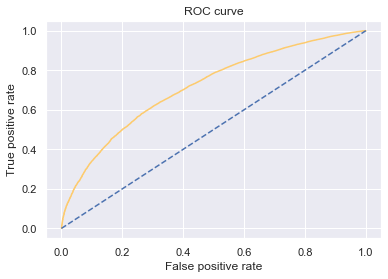

In [198]:
fpr, tpr, thresholds = roc_curve(df_actual_pred_probs['loan_data_targets_test'],
                                 df_actual_pred_probs['y_hat_test_prob'])

plt.plot(fpr, tpr, color = '#fdcb6e')
plt.plot(fpr, fpr, linestyle = '--', color = 'b')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [199]:
AUROC = roc_auc_score(df_actual_pred_probs['loan_data_targets_test'], df_actual_pred_probs['y_hat_test_prob'])
AUROC

0.7152991968190319

In [200]:
thresholds

array([1.99579106, 0.99579106, 0.99208214, ..., 0.46520846, 0.45789705,
       0.43616555])

In [201]:
thresholds.shape

(15561,)

In [202]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis =1)
df_cutoffs.columns = ["thresholds", "fpr", "tpr"]

In [203]:
df_cutoffs["thresholds"][0] = 1 -1 / np.power(10, 16)

In [204]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.995791,0.000113,0.000000
2,0.992082,0.000113,0.002809
3,0.992060,0.000225,0.002809
4,0.991389,0.000225,0.004551


In [205]:
#To calculate the score from prob to be good
df_cutoffs["score"] = ((np.log(df_cutoffs["thresholds"] / (1 - df_cutoffs["thresholds"])) - min_sum_coef) * \
                       ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [206]:
df_cutoffs.head()

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.000000,2072.0
1,0.995791,0.000113,0.000000,831.0
2,0.992082,0.000113,0.002809,781.0
3,0.992060,0.000225,0.002809,781.0
4,0.991389,0.000225,0.004551,775.0


In [207]:
#We max the max_score on the 1st row
df_cutoffs["score"][0] = max_score

In [208]:
df_cutoffs.head(2)

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.0,850.0
1,0.995791,0.000113,0.0,831.0


In [209]:
#Approval & rejection rate for each possible cutt off points
def n_approved(p):
    return np.where(df_actual_pred_probs['y_hat_test_prob'] >= p, 1, 0).sum()

In [210]:
df_cutoffs["Nber_Approved"] = df_cutoffs["thresholds"].apply(n_approved)
df_cutoffs["Nber_Rejected"] = df_actual_pred_probs['y_hat_test_prob'].shape[0] - df_cutoffs["Nber_Approved"]
df_cutoffs["Approval_Rate"] = df_cutoffs["Nber_Approved"] / df_actual_pred_probs['y_hat_test_prob'].shape[0]
df_cutoffs["Rejection_Rate"] = 1 - df_cutoffs["Approval_Rate"]

In [211]:
df_cutoffs.head()

,thresholds,fpr,tpr,score,Nber_Approved,Nber_Rejected,Approval_Rate,Rejection_Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.995791,0.000113,0.000000,831.0,1,93256,0.000011,0.999989
2,0.992082,0.000113,0.002809,781.0,238,93019,0.002552,0.997448
3,0.992060,0.000225,0.002809,781.0,239,93018,0.002563,0.997437
4,0.991389,0.000225,0.004551,775.0,386,92871,0.004139,0.995861


In [212]:
df_cutoffs.tail()

,thresholds,fpr,tpr,score,Nber_Approved,Nber_Rejected,Approval_Rate,Rejection_Rate
15556,0.471989,0.999549,0.999976,395.0,93251,6,0.999936,0.000064
15557,0.466420,0.999887,0.999976,394.0,93254,3,0.999968,0.000032
15558,0.465208,0.999887,0.999988,393.0,93255,2,0.999979,0.000021
15559,0.457897,1.000000,0.999988,391.0,93256,1,0.999989,0.000011
15560,0.436166,1.000000,1.000000,384.0,93257,0,1.000000,0.000000


In [213]:
#Let's assume the higher possible PD we'd accept is 10%
#i.e the lowest possible prob of being good is 90%
df_cutoffs.iloc[5000: 6000, ]
#we would end up with 63.23% approval rate and 36.76% rejection rate

,thresholds,fpr,tpr,score,Nber_Approved,Nber_Rejected,Approval_Rate,Rejection_Rate
5000,0.911259,0.286664,0.602327,586.0,53371,39886,0.572300,0.427700
5001,0.911251,0.286890,0.602327,586.0,53373,39884,0.572322,0.427678
5002,0.911243,0.286890,0.602387,586.0,53378,39879,0.572375,0.427625
5003,0.911241,0.287003,0.602387,586.0,53379,39878,0.572386,0.427614
5004,0.911223,0.287003,0.602553,586.0,53393,39864,0.572536,0.427464
...,...,...,...,...,...,...,...,...
5995,0.900660,0.348890,0.658545,576.0,58667,34590,0.629090,0.370910
5996,0.900642,0.348890,0.658628,576.0,58674,34583,0.629165,0.370835
5997,0.900628,0.349115,0.658628,576.0,58676,34581,0.629186,0.370814
5998,0.900626,0.349115,0.658664,576.0,58679,34578,0.629218,0.370782


In [214]:
#in the case of a 5% PD thresholds
#i.e 95% PD of non default
df_cutoffs.iloc[1000: 2000, ]
#we would end up with 29.82% approval rate and 70.17% rejection rate

,thresholds,fpr,tpr,score,Nber_Approved,Nber_Rejected,Approval_Rate,Rejection_Rate
1000,0.960411,0.053658,0.232479,653.0,20094,73163,0.215469,0.784531
1001,0.960410,0.053771,0.232479,653.0,20095,73162,0.215480,0.784520
1002,0.960383,0.053771,0.232669,653.0,20111,73146,0.215651,0.784349
1003,0.960382,0.053883,0.232669,653.0,20112,73145,0.215662,0.784338
1004,0.960365,0.053883,0.232799,653.0,20123,73134,0.215780,0.784220
...,...,...,...,...,...,...,...,...
1995,0.945560,0.109232,0.355699,627.0,30985,62272,0.332254,0.667746
1996,0.945555,0.109345,0.355699,627.0,30986,62271,0.332265,0.667735
1997,0.945521,0.109345,0.355971,627.0,31009,62248,0.332511,0.667489
1998,0.945519,0.109458,0.355971,627.0,31010,62247,0.332522,0.667478


In [215]:
df_scorecard.to_csv(r"D:\DataBases\DataSets\Credit_Risk_Modeling\df_scorecard.csv")
inputs_train_with_ref_cat.to_csv(r"D:\DataBases\DataSets\Credit_Risk_Modeling\inputs_train_with_ref_cat.csv")